# Importing the Data
Import the data from Zenodo

In [1]:
import pandas as pd

pauls_url = "https://zenodo.org/records/4537209/files/statistics.csv"
jurmala_url = "https://zenodo.org/records/5808764/files/statistics.csv"
metc_url = "https://zenodo.org/records/5808789/files/statistics.csv"

pauls_df = pd.read_csv(pauls_url)
jurmala_df = pd.read_csv(jurmala_url)
metc_df = pd.read_csv(metc_url)

Checking the data out

In [2]:
print("Pauls")
print(pauls_df.shape)
pauls_df.head()

Pauls
(3185, 19)


,filename,location,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,movement_3,movement_4,movement_5,movement_6,movement_7,movement_0,ring,armband,long_nails
0,2020-06-26_18-28-10_camera102.csv,DataSet1,4,18,28,10,43.5,32.71.1,2.4,2.1,1.5,6.6,3.9,0.0,15.0,0,0,0,NaN
1,2020-06-26_19-05-32_camera102.csv,DataSet1,4,19,5,32,53.5,31.63.4,1.9,2.0,0.0,3.7,0.0,0.0,20.6,0,0,0,NaN
2,2020-06-26_19-39-32_camera102.csv,DataSet1,4,19,39,32,185.8,143.015.8,6.3,26.2,18.7,29.7,1.8,0.0,44.5,0,0,0,NaN
3,2020-06-26_19-42-41_camera102.csv,DataSet1,3,19,42,41,27.7,27.50.8,1.7,0.0,0.0,0.0,0.0,0.0,25.1,0,0,0,NaN
4,2020-06-26_20-09-27_camera102.csv,DataSet1,4,20,9,27,63.1,42.65.3,5.3,3.0,5.3,6.3,2.3,0.0,15.0,0,0,0,NaN


The Pauls data has missing values for `long_nails` and has an odd format to `washing_duration`. We believe that `washing_duration` and `movement_1` were accidentally combined. Below we will separate these columns in the Data Cleaning section.

In [3]:
print("Jurmala")
print(jurmala_df.shape)
jurmala_df.head()

Jurmala
(2427, 19)


,filename,location,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,movement_3,movement_4,movement_5,movement_6,movement_7,movement_0,ring,armband,long_nails
0,2020-09-27_04-22-11_camera100.avi-fix.mp4,Location_1,2,4,22,11,39.6,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,1,0,0
1,2020-09-27_06-22-44_camera100.avi-fix.mp4,Location_1,2,6,22,44,37.8,14.4,0.5,1.5,1.9,1.1,0.7,0.9,0.0,7.7,1,0,0
2,2020-09-27_06-44-04_camera100.avi-fix.mp4,Location_1,2,6,44,4,32.8,7.9,1.6,0.6,0.4,0.0,0.0,0.0,0.0,5.2,0,0,0
3,2020-09-27_06-58-39_camera100.avi-fix.mp4,Location_1,2,6,58,39,16.7,5.2,0.2,1.3,0.4,0.0,0.0,0.0,0.0,3.4,1,0,0
4,2020-09-27_07-04-00_camera100.avi-fix.mp4,Location_1,2,7,4,0,12.6,2.7,0.6,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0,0,0


In [4]:
print("METC")
print(metc_df.shape)
metc_df.head()

METC
(212, 19)


,filename,location,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,movement_3,movement_4,movement_5,movement_6,movement_7,movement_0,ring,armband,long_nails
0,2021-06-30_09-56-19-11labots.mp4,Interface_number_1,1,9,56,19,67.5,67.5,9.4,11.1,10.4,10.8,10.1,9.6,0.0,6.2,0,0,0
1,2021-06-30_10-28-33-2-1+labots.mp4,Interface_number_1,1,10,28,33,88.0,88.0,13.6,13.1,13.0,13.8,12.8,14.2,0.0,7.7,0,0,0
2,2021-06-30_10-28-33-2-1_labots.mp4,Interface_number_1,1,10,28,33,88.0,88.0,13.6,13.1,13.0,13.8,12.8,14.2,0.0,7.7,0,0,0
3,2021-06-30_11-18-05-3-1.mp4,Interface_number_1,1,11,18,5,136.4,136.4,11.2,10.2,14.3,8.7,9.3,2.9,0.0,79.8,0,0,0
4,2021-06-30_11-37-29-4-1.mp4,Interface_number_1,1,11,37,29,80.9,80.9,9.4,9.8,9.6,9.6,9.6,9.7,0.0,23.1,0,0,0


## Data Cleaning
We noticed that in the Pauls dataset that their `washing_duration` and `movement_1` columns are concatenated.

In [5]:
# Only run if washing_duration contains two '.' (meaning it hasn't been fixed yet)
if pauls_df['washing_duration'].astype(str).str.contains(r'\..*\.').any():
    
    # Shift columns to the right (from movement_1 to armband). Work backwards to avoid overwriting.
    pauls_df['long_nails'] = pauls_df['armband']
    pauls_df['armband'] = pauls_df['ring']
    pauls_df['ring'] = pauls_df['movement_0']
    pauls_df['movement_0'] = pauls_df['movement_7']
    pauls_df['movement_7'] = pauls_df['movement_6']
    pauls_df['movement_6'] = pauls_df['movement_5']
    pauls_df['movement_5'] = pauls_df['movement_4']
    pauls_df['movement_4'] = pauls_df['movement_3']
    pauls_df['movement_3'] = pauls_df['movement_2']
    pauls_df['movement_2'] = pauls_df['movement_1']
    pauls_df['movement_1'] = None  # Clear movement_1 so it can be filled from washing_duration
    
    # Split 'washing_duration' - keep first decimal place, rest goes to movement_1
    split_data = pauls_df['washing_duration'].astype(str).str.extract(r'(\d+\.\d)(.*)')
    pauls_df['washing_duration'] = pd.to_numeric(split_data[0])
    pauls_df['movement_1'] = pd.to_numeric(split_data[1])

# Verification
print(pauls_df[['washing_duration', 'movement_1', 'movement_2', 'movement_3']].head())

   washing_duration  movement_1  movement_2  movement_3
0              32.7         1.1         2.4         2.1
1              31.6         3.4         1.9         2.0
2             143.0        15.8         6.3        26.2
3              27.5         0.8         1.7         0.0
4              42.6         5.3         5.3         3.0


There were also instances that we noticed where the duration of the duration of `movement_7` was equal to the `washing_duration`. It's highly unlikely that someone spent their entire handwashing time turning off a faucet with a towel, so we are excluding this data.

In [6]:
def remove_invalid_movement7(df):
    # Count rows before
    rows_before = len(df)
    
    # Remove rows where movement_7 equals washing_duration
    df_cleaned = df[df['movement_7'] != df['washing_duration']].copy()
    
    # Count rows removed
    rows_removed = rows_before - len(df_cleaned)
    
    print(f"Removed {rows_removed} rows where movement_7 = washing_duration")
    print(f"Remaining rows: {len(df_cleaned)}")
    
    return df_cleaned

# Verification
pauls_df = remove_invalid_movement7(pauls_df)
jurmala_df = remove_invalid_movement7(jurmala_df)
metc_df = remove_invalid_movement7(metc_df)

Removed 24 rows where movement_7 = washing_duration
Remaining rows: 3161
Removed 8 rows where movement_7 = washing_duration
Remaining rows: 2419
Removed 0 rows where movement_7 = washing_duration
Remaining rows: 212


## Exploratory Data Analysis

Combining the dataframes together and doing some exploratory data analysis

In [7]:
#combine dataframes together
combined_df = pd.concat([
    pauls_df.assign(location="Pauls Stradins"),
    jurmala_df.assign(location="Jurmala"),
    metc_df.assign(location="METC")
], ignore_index=True)



In [8]:
combined_df.head()

,filename,location,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,movement_3,movement_4,movement_5,movement_6,movement_7,movement_0,ring,armband,long_nails
0,2020-06-26_18-28-10_camera102.csv,Pauls Stradins,4,18,28,10,43.5,32.7,1.1,2.4,2.1,1.5,6.6,3.9,0.0,15.0,0,0,0
1,2020-06-26_19-05-32_camera102.csv,Pauls Stradins,4,19,5,32,53.5,31.6,3.4,1.9,2.0,0.0,3.7,0.0,0.0,20.6,0,0,0
2,2020-06-26_19-39-32_camera102.csv,Pauls Stradins,4,19,39,32,185.8,143.0,15.8,6.3,26.2,18.7,29.7,1.8,0.0,44.5,0,0,0
3,2020-06-26_19-42-41_camera102.csv,Pauls Stradins,3,19,42,41,27.7,27.5,0.8,1.7,0.0,0.0,0.0,0.0,0.0,25.1,0,0,0
4,2020-06-26_20-09-27_camera102.csv,Pauls Stradins,4,20,9,27,63.1,42.6,5.3,5.3,3.0,5.3,6.3,2.3,0.0,15.0,0,0,0


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filename          5792 non-null   object 
 1   location          5792 non-null   object 
 2   num_annotators    5792 non-null   int64  
 3   time_h            5792 non-null   int64  
 4   time_min          5792 non-null   int64  
 5   time_sec          5792 non-null   int64  
 6   total_duration    5792 non-null   float64
 7   washing_duration  5792 non-null   float64
 8   movement_1        5792 non-null   float64
 9   movement_2        5792 non-null   float64
 10  movement_3        5792 non-null   float64
 11  movement_4        5792 non-null   float64
 12  movement_5        5792 non-null   float64
 13  movement_6        5792 non-null   float64
 14  movement_7        5792 non-null   float64
 15  movement_0        5792 non-null   float64
 16  ring              5792 non-null   int64  


In [10]:
combined_df.describe()

,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,movement_3,movement_4,movement_5,movement_6,movement_7,movement_0,ring,armband,long_nails
count,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,2.016229,11.350483,29.819924,29.539192,36.347756,20.801243,1.789434,1.368767,1.081457,0.816661,0.940366,0.845528,0.336136,13.624413,0.201485,0.175242,0.104109
std,0.908761,5.457589,17.381541,17.366055,28.029703,22.228913,2.395752,2.833366,2.558920,2.268879,2.535101,2.932760,1.924139,12.781647,0.401144,0.380207,0.305428
min,1.000000,0.000000,0.000000,0.000000,0.900000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.000000,15.000000,14.000000,18.600000,6.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,0.000000,0.000000,0.000000
50%,2.000000,11.000000,30.000000,30.000000,28.400000,12.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.700000,0.000000,0.000000,0.000000
75%,2.000000,15.000000,45.000000,45.000000,45.725000,26.700000,2.200000,1.400000,1.100000,0.000000,0.000000,0.000000,0.000000,17.825000,0.000000,0.000000,0.000000
max,7.000000,23.000000,59.000000,59.000000,988.200000,229.900000,30.600000,34.100000,40.000000,21.300000,31.000000,86.200000,32.100000,147.000000,1.000000,1.000000,1.000000


In [11]:
combined_df.isna().sum()

filename            0
location            0
num_annotators      0
time_h              0
time_min            0
time_sec            0
total_duration      0
washing_duration    0
movement_1          0
movement_2          0
movement_3          0
movement_4          0
movement_5          0
movement_6          0
movement_7          0
movement_0          0
ring                0
armband             0
long_nails          0
dtype: int64

In [12]:
#samity checks
#make sure washing duration is no longer than total duration
(combined_df["washing_duration"] > combined_df["total_duration"]).sum()

0

In [13]:
#make sure the sum of movements is same as the washing duration
combined_df["movement_sum"]=combined_df[["movement_0","movement_1","movement_2","movement_3",
            "movement_4","movement_5","movement_6","movement_7"]].sum(axis=1)
combined_df["diff_movement"]=combined_df["movement_sum"]-combined_df["washing_duration"]

In [14]:
combined_df.describe()

,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,movement_3,movement_4,movement_5,movement_6,movement_7,movement_0,ring,armband,long_nails,movement_sum,diff_movement
count,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,2.016229,11.350483,29.819924,29.539192,36.347756,20.801243,1.789434,1.368767,1.081457,0.816661,0.940366,0.845528,0.336136,13.624413,0.201485,0.175242,0.104109,20.802762,0.001519
std,0.908761,5.457589,17.381541,17.366055,28.029703,22.228913,2.395752,2.833366,2.558920,2.268879,2.535101,2.932760,1.924139,12.781647,0.401144,0.380207,0.305428,22.230777,0.054319
min,1.000000,0.000000,0.000000,0.000000,0.900000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,-0.200000
25%,2.000000,8.000000,15.000000,14.000000,18.600000,6.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,0.000000,0.000000,0.000000,6.400000,0.000000
50%,2.000000,11.000000,30.000000,30.000000,28.400000,12.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.700000,0.000000,0.000000,0.000000,12.700000,0.000000
75%,2.000000,15.000000,45.000000,45.000000,45.725000,26.700000,2.200000,1.400000,1.100000,0.000000,0.000000,0.000000,0.000000,17.825000,0.000000,0.000000,0.000000,26.700000,0.000000
max,7.000000,23.000000,59.000000,59.000000,988.200000,229.900000,30.600000,34.100000,40.000000,21.300000,31.000000,86.200000,32.100000,147.000000,1.000000,1.000000,1.000000,229.900000,0.200000


## Feature Engineering

Create some fields that may be helpful in the learning exercises

In [15]:
combined_df['has_jewelry']=(combined_df['ring']|combined_df['armband']).astype(int)
combined_df['fraction_washing']=(combined_df['washing_duration']/combined_df['total_duration'])
movement_cols = [f'movement_{i}' for i in range(8)]
combined_df['movement_balance'] = (
    combined_df[movement_cols].std(axis=1) / combined_df[movement_cols].mean(axis=1)
)


In [16]:
# identify ratio of using some non-WHO movement vs WHO movements and standardize
import numpy as np
movement_cols0 = [f'movement_{i}' for i in range(1, 8)]
combined_df['ratio_who_movements'] = np.where(
    combined_df[movement_cols0].sum(axis=1) != 0,
    combined_df['movement_0'] / combined_df[movement_cols0].sum(axis=1),
    0
)

#standardize it
combined_df['ratio_who_movements_z'] = (
    (combined_df['ratio_who_movements'] - combined_df['ratio_who_movements'].mean()) /
    combined_df['ratio_who_movements'].std()
)
'''
combined_df['compliance'] = np.where(
    (combined_df[movement_cols0].sum(axis=1) >= 20) & 
    ((combined_df[movement_cols0] > 0).sum(axis=1) >= 4) & 
    (combined_df['has_jewelry'] == 0) & 
    (combined_df['long_nails'] == 0),
    1,  # compliant
    0   # not compliant
)
'''

# Condition checks
cond1 = (combined_df[movement_cols0].sum(axis=1) >= 20).astype(int)
cond2 = ((combined_df[movement_cols0] > 0).sum(axis=1) >= 4).astype(int)
cond3 = (combined_df['has_jewelry'] == 0).astype(int)
cond4 = (combined_df['long_nails'] == 0).astype(int)

# Weighted compliance score (0 to 1)
combined_df['compliance_score'] = (cond1 + cond2 + cond3 + cond4) / 4

combined_df['compliance_flag'] = (combined_df['compliance_score'] == 1).astype(int)

percent_compliant = combined_df['compliance_flag'].mean() * 100
print(f"Percent compliant: {percent_compliant:.2f}%")


Percent compliant: 8.94%


## Create date and time variables
Date is embedded in the filename. Will need to extract that first. Then create a time of day variable from the hour, minute and second columns. Then create some time and date categorical variables for analysis

In [21]:
#create date variable from the filename
combined_df["date"] = combined_df["filename"].str.extract(r"(\d{4}-\d{2}-\d{2})")

combined_df["datetime"] = pd.to_datetime(
    combined_df["date"] + " " +
    combined_df["time_h"].astype(str) + ":" +
    combined_df["time_min"].astype(str) + ":" +
    combined_df["time_sec"].astype(str),
    format="%Y-%m-%d %H:%M:%S"
)



In [22]:
def categorize_time_of_day(dt):
    hour = dt.hour
    if 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    elif 18 <= hour < 24:
        return "evening"
    else:
        return "overnight"

combined_df["time_of_day_cat"] = combined_df["datetime"].apply(categorize_time_of_day)

In [23]:
combined_df["day_type"] = combined_df["datetime"].dt.dayofweek.apply(
    lambda x: "weekend" if x >= 5 else "weekday"
)

In [24]:
combined_df.describe()

,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,movement_3,movement_4,...,movement_sum,diff_movement,has_jewelry,fraction_washing,movement_balance,ratio_who_movements,ratio_who_movements_z,compliance_score,compliance_flag,datetime
count,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,...,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5.792000e+03,5792.000000,5792.000000,5792
mean,2.016229,11.350483,29.819924,29.539192,36.347756,20.801243,1.789434,1.368767,1.081457,0.816661,...,20.802762,0.001519,0.318025,0.503159,2.147359,6.362324,6.624535e-17,0.479023,0.089434,2020-08-29 03:12:58.265020672
min,1.000000,0.000000,0.000000,0.000000,0.900000,0.400000,0.000000,0.000000,0.000000,0.000000,...,0.400000,-0.200000,0.000000,0.006780,0.357118,0.000000,-6.147242e-01,0.000000,0.000000,2020-06-26 17:50:10
25%,2.000000,8.000000,15.000000,14.000000,18.600000,6.400000,0.400000,0.000000,0.000000,0.000000,...,6.400000,0.000000,0.000000,0.308072,1.852742,0.924262,-5.254225e-01,0.250000,0.000000,2020-07-06 13:47:36.249999872
50%,2.000000,11.000000,30.000000,30.000000,28.400000,12.700000,1.000000,0.000000,0.000000,0.000000,...,12.700000,0.000000,0.000000,0.474123,2.294586,3.059263,-3.191400e-01,0.500000,0.000000,2020-07-25 12:55:26
75%,2.000000,15.000000,45.000000,45.000000,45.725000,26.700000,2.200000,1.400000,1.100000,0.000000,...,26.700000,0.000000,1.000000,0.684831,2.607571,7.893934,1.479834e-01,0.500000,0.000000,2020-10-03 08:36:14
max,7.000000,23.000000,59.000000,59.000000,988.200000,229.900000,30.600000,34.100000,40.000000,21.300000,...,229.900000,0.200000,1.000000,1.000000,2.828427,165.000000,1.532749e+01,1.000000,1.000000,2021-08-13 13:28:54
std,0.908761,5.457589,17.381541,17.366055,28.029703,22.228913,2.395752,2.833366,2.558920,2.268879,...,22.230777,0.054319,0.465749,0.250507,0.590158,10.349883,1.000000e+00,0.248315,0.285393,NaN


In [25]:
combined_df.head(100)

,filename,location,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,...,movement_balance,ratio_who_movements,ratio_who_movements_z,compliance_score,compliance_flag,time_of_day,date,datetime,time_of_day_cat,day_type
0,2020-06-26_18-28-10_camera102.csv,Pauls Stradins,4,18,28,10,43.5,32.7,1.1,2.4,...,1.189814,0.852273,-0.532378,0.75,0,18:28:10,2020-06-26,2020-06-26 18:28:10,evening,weekday
1,2020-06-26_19-05-32_camera102.csv,Pauls Stradins,4,19,5,32,53.5,31.6,3.4,1.9,...,1.744554,1.872727,-0.433782,0.75,0,19:05:32,2020-06-26,2020-06-26 19:05:32,evening,weekday
2,2020-06-26_19-39-32_camera102.csv,Pauls Stradins,4,19,39,32,185.8,143.0,15.8,6.3,...,0.854973,0.451777,-0.571074,1.00,1,19:39:32,2020-06-26,2020-06-26 19:39:32,evening,weekday
3,2020-06-26_19-42-41_camera102.csv,Pauls Stradins,3,19,42,41,27.7,27.5,0.8,1.7,...,2.541863,10.040000,0.355335,0.50,0,19:42:41,2020-06-26,2020-06-26 19:42:41,evening,weekday
4,2020-06-26_20-09-27_camera102.csv,Pauls Stradins,4,20,9,27,63.1,42.6,5.3,5.3,...,0.834169,0.545455,-0.562023,1.00,1,20:09:27,2020-06-26,2020-06-26 20:09:27,evening,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-07-08_10-51-07_camera101.csv,Pauls Stradins,2,10,51,7,57.3,44.3,3.2,2.8,...,2.309200,5.082192,-0.123686,0.50,0,10:51:07,2020-07-08,2020-07-08 10:51:07,morning,weekday
96,2020-07-09_01-00-04_camera101.csv,Pauls Stradins,1,1,0,4,14.4,2.9,1.1,0.0,...,1.823539,1.416667,-0.477847,0.50,0,01:00:04,2020-07-09,2020-07-09 01:00:04,overnight,weekday
97,2020-07-09_04-10-08_camera101.csv,Pauls Stradins,2,4,10,8,53.9,34.8,1.8,3.6,...,1.676957,1.748031,-0.445830,0.75,0,04:10:08,2020-07-09,2020-07-09 04:10:08,overnight,weekday
98,2020-07-09_11-09-53_camera101.csv,Pauls Stradins,2,11,9,53,46.6,32.0,4.5,3.7,...,1.163124,0.860465,-0.531587,0.75,0,11:09:53,2020-07-09,2020-07-09 11:09:53,morning,weekday


In [26]:
#to inspect after combining and feature engineering
combined_df.to_csv("hand_hygiene_combined.csv", index=False)

## Data Transformations
Look at each of the variables distributions and see what kind of transformations will need to be performed.

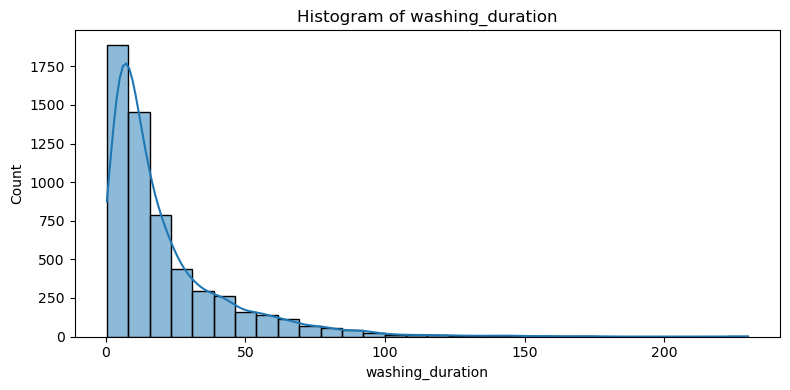

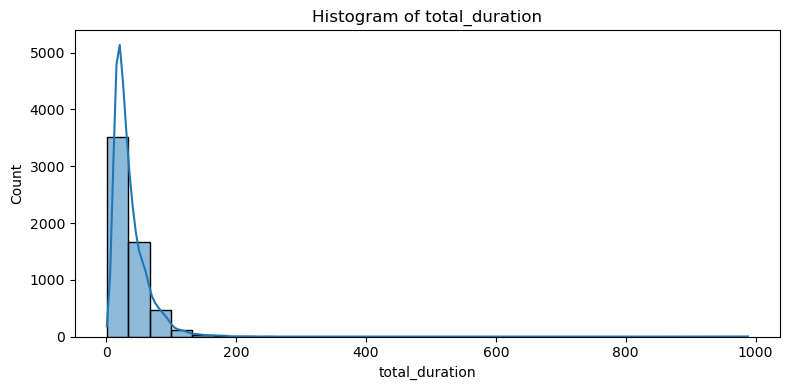

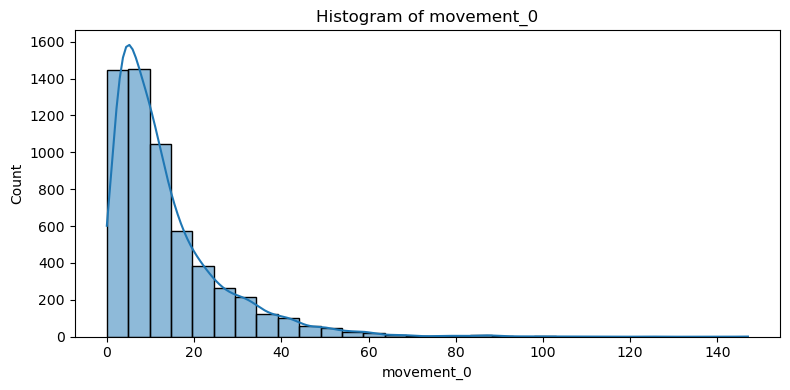

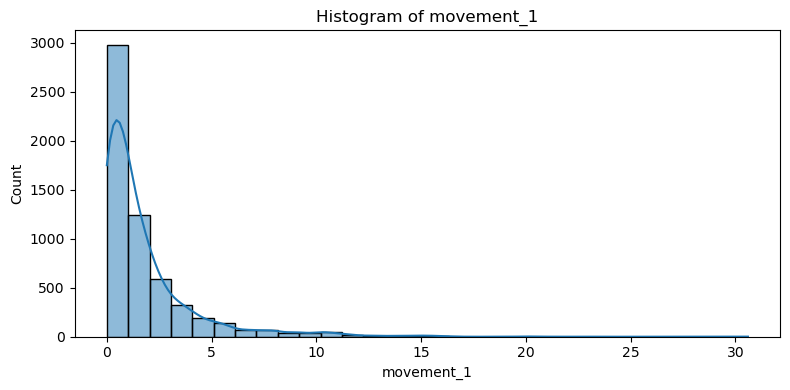

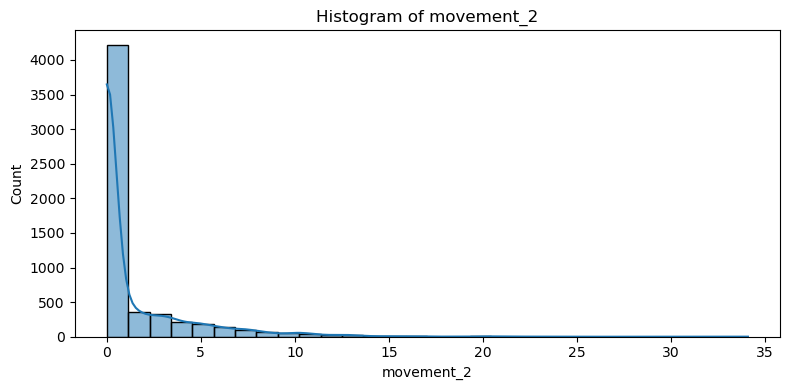

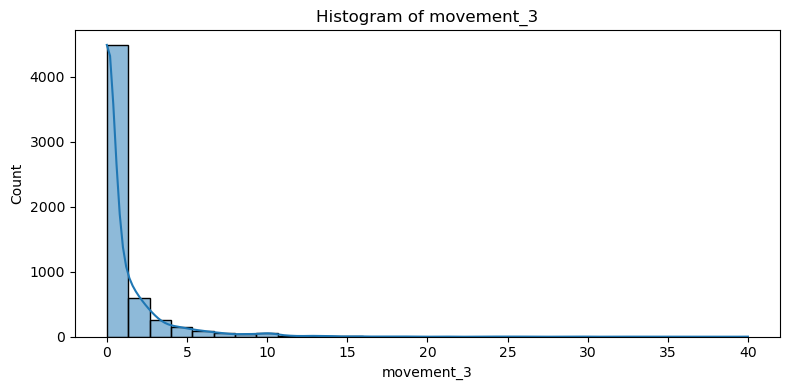

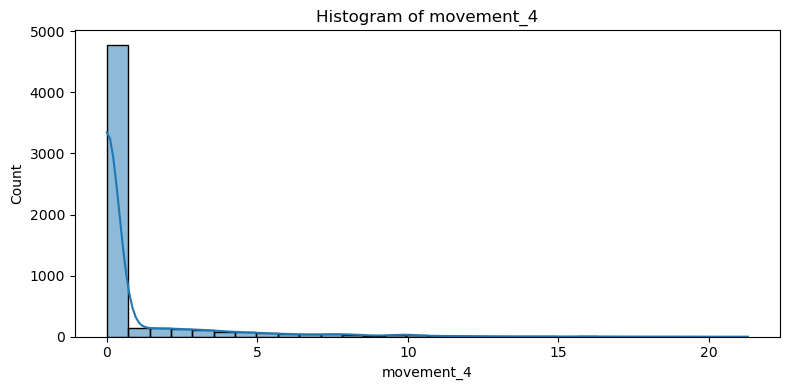

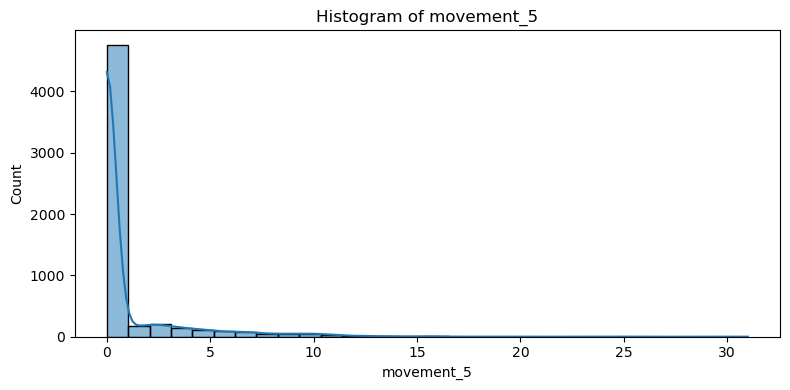

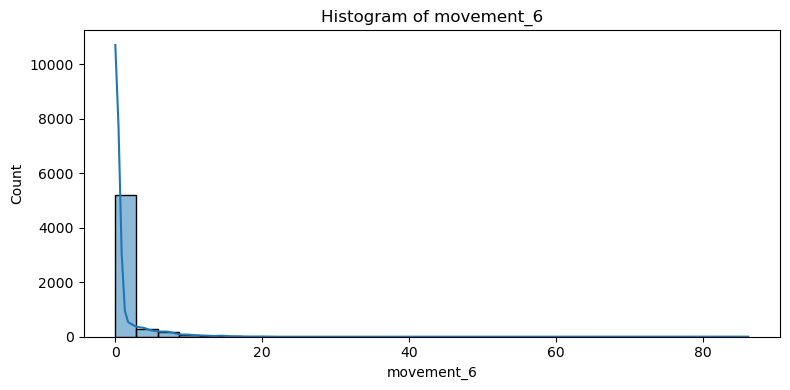

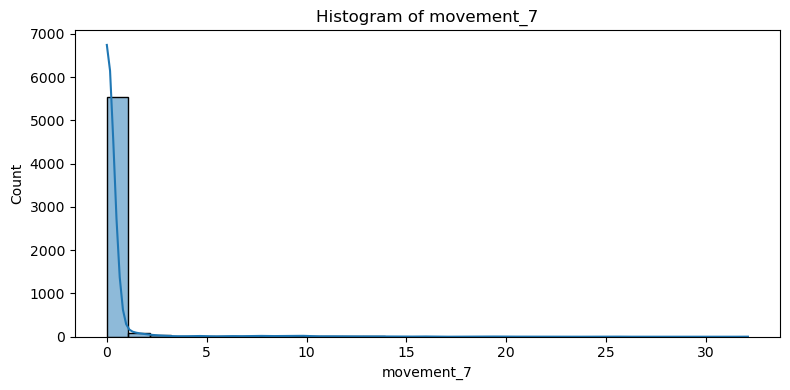

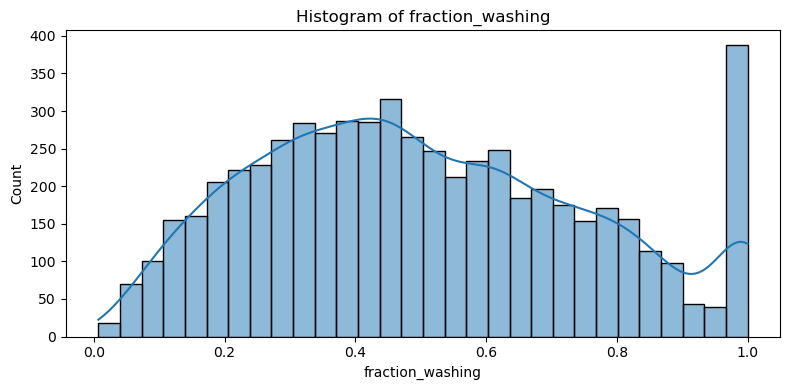

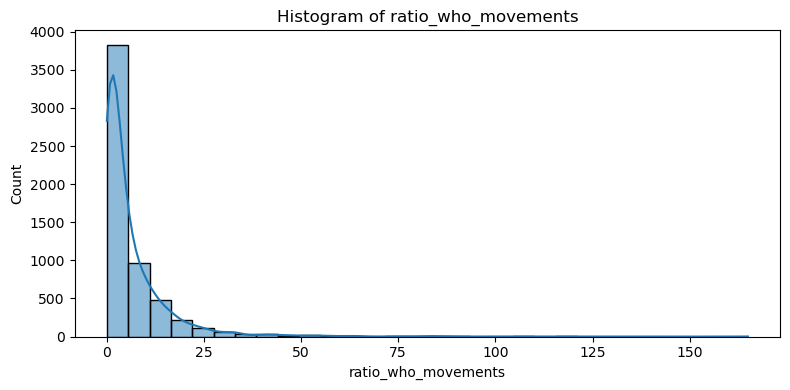

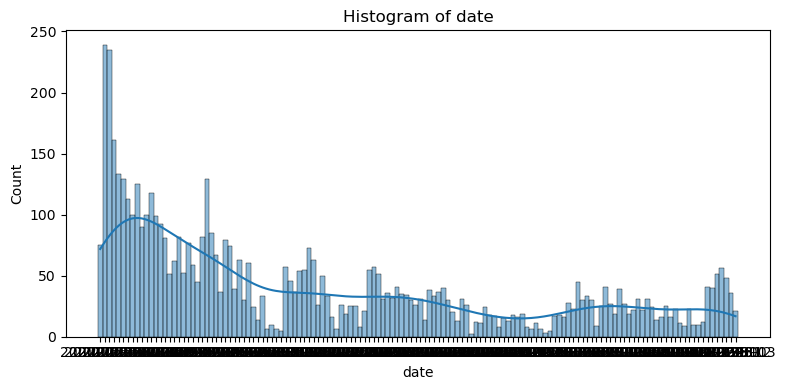

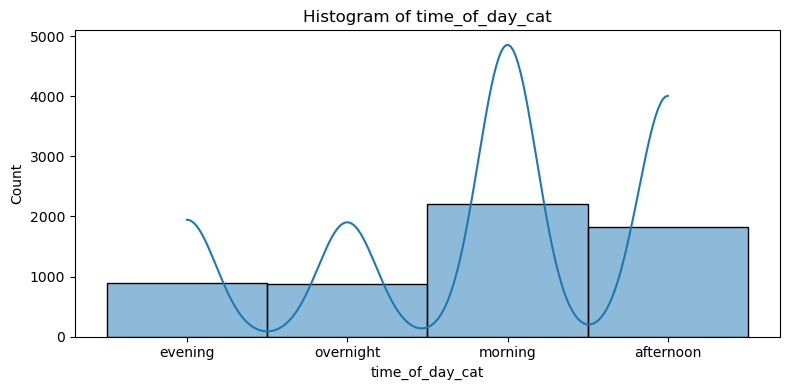

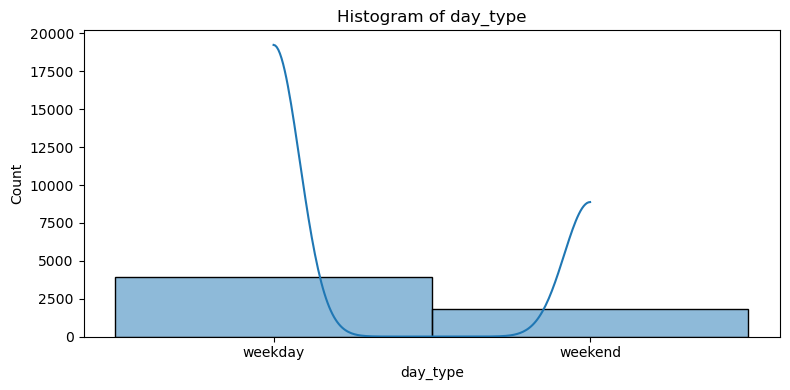

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to inspect
cols = [
    "washing_duration",
    "total_duration",
    "movement_0",
    "movement_1",
    "movement_2",
    "movement_3",
    "movement_4",
    "movement_5",
    "movement_6",
    "movement_7",
    "fraction_washing",
    "ratio_who_movements",
    "date",
    "time_of_day_cat",
    "day_type"
]

# Loop through and plot histograms
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(combined_df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


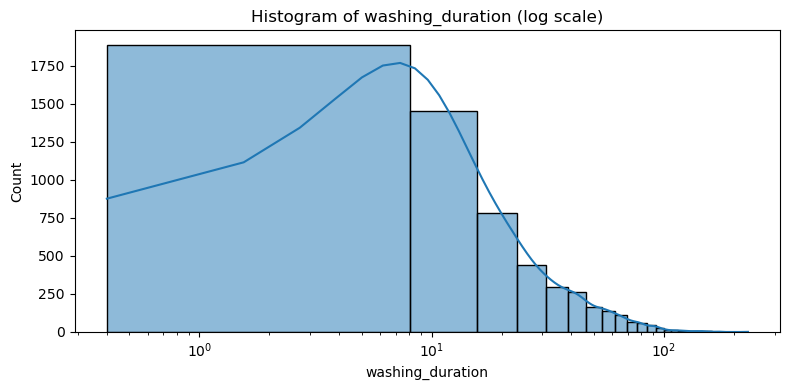

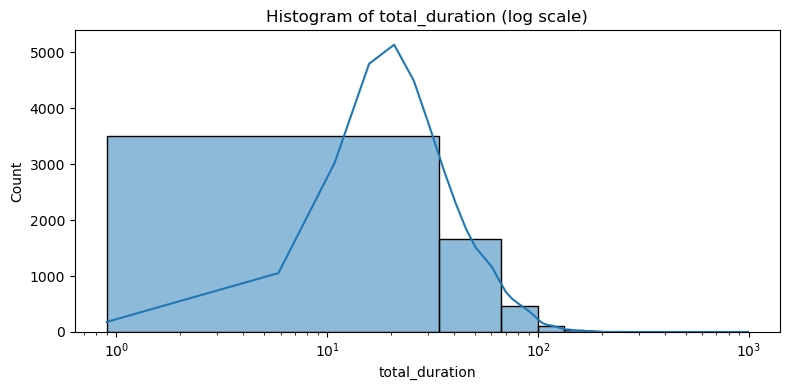

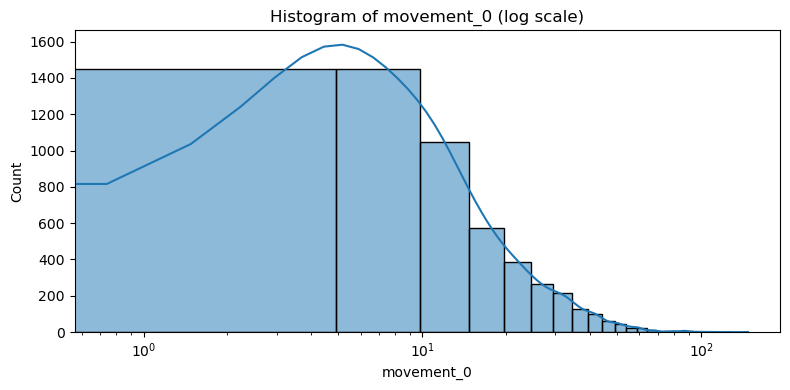

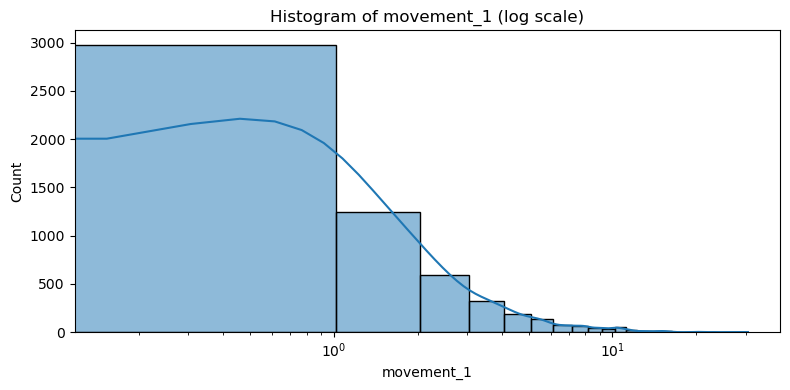

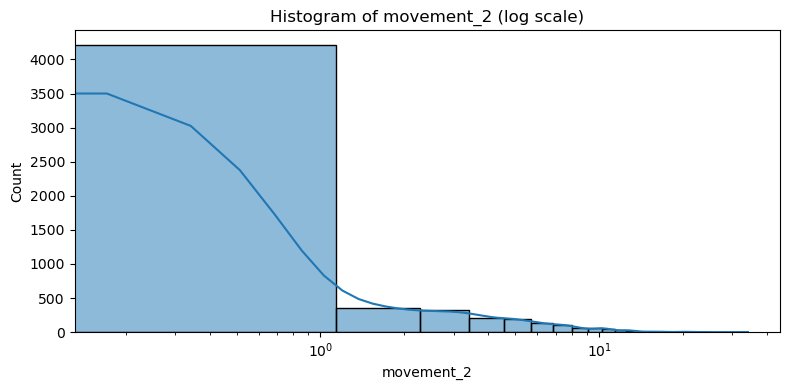

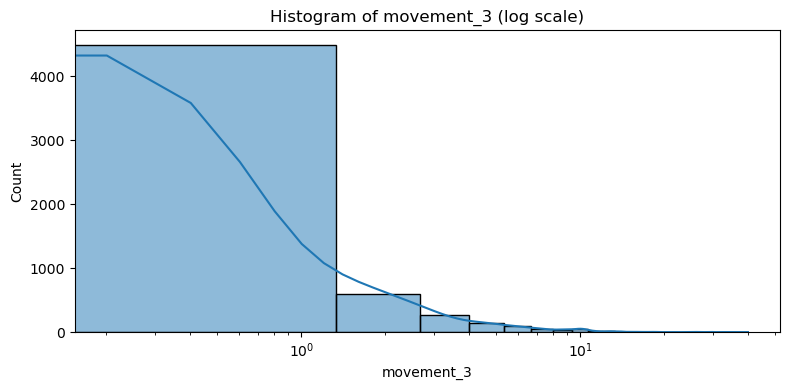

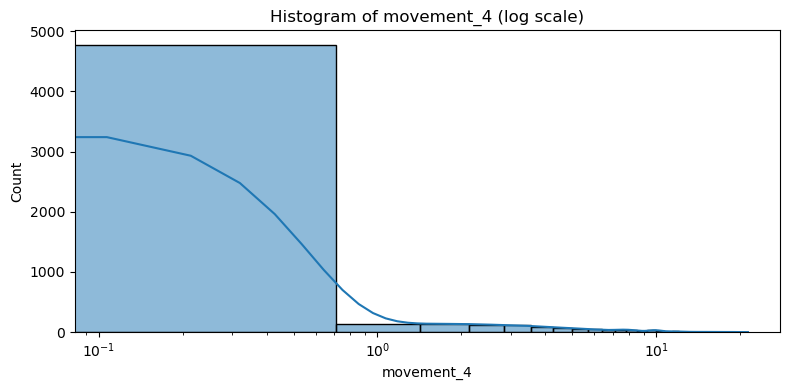

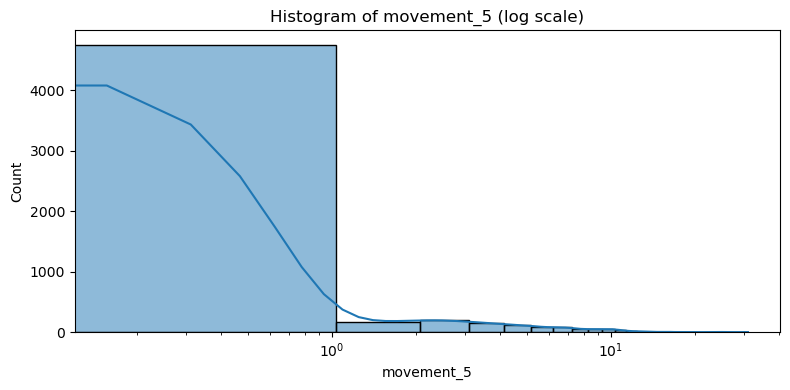

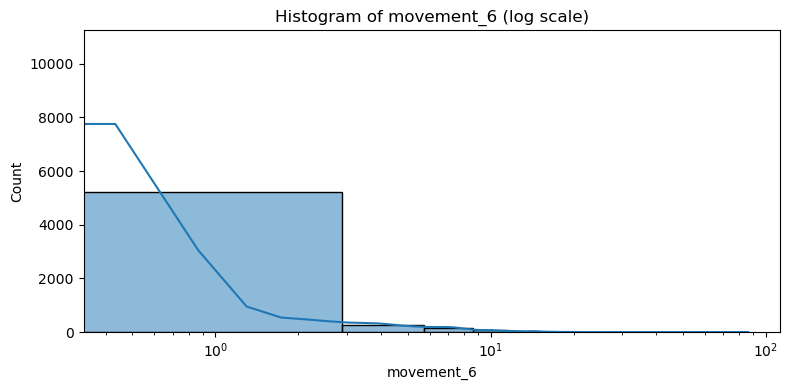

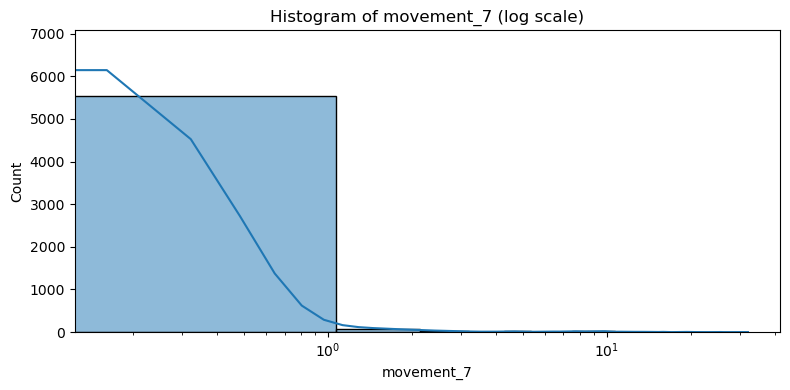

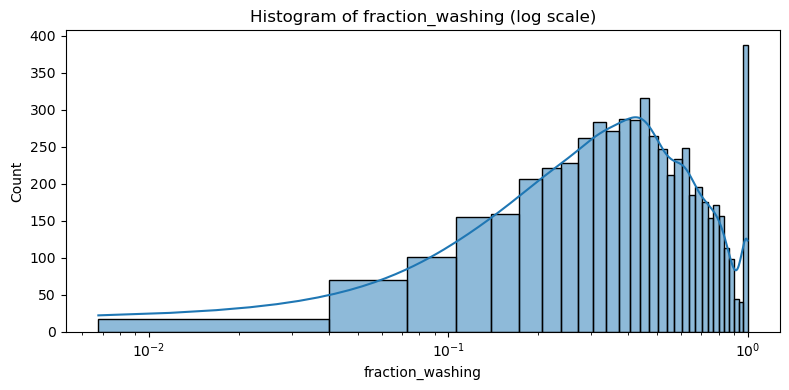

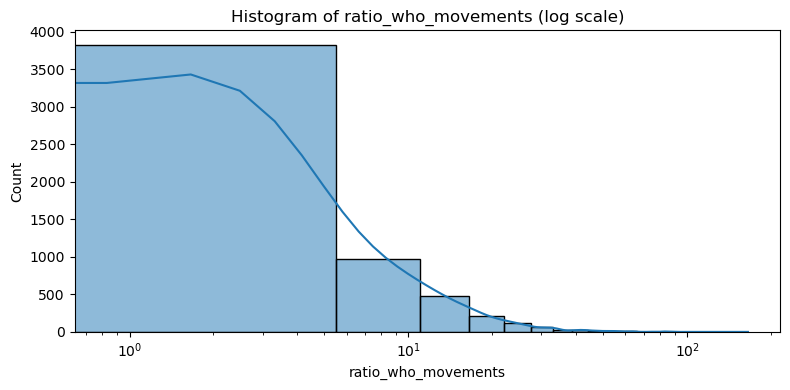

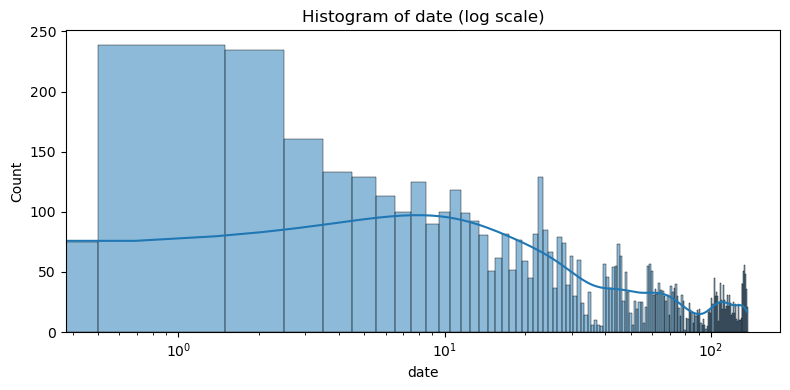

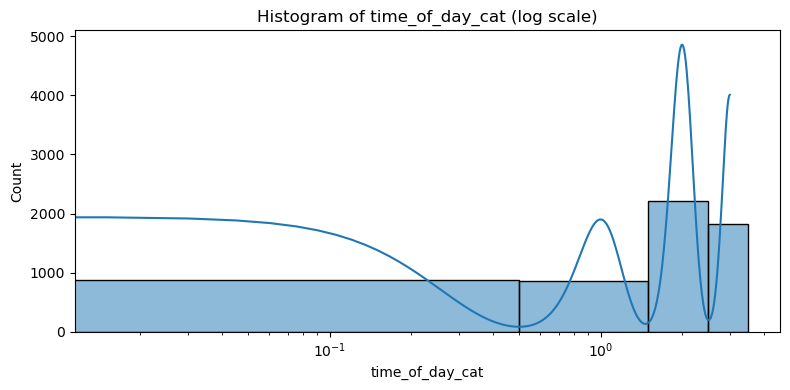

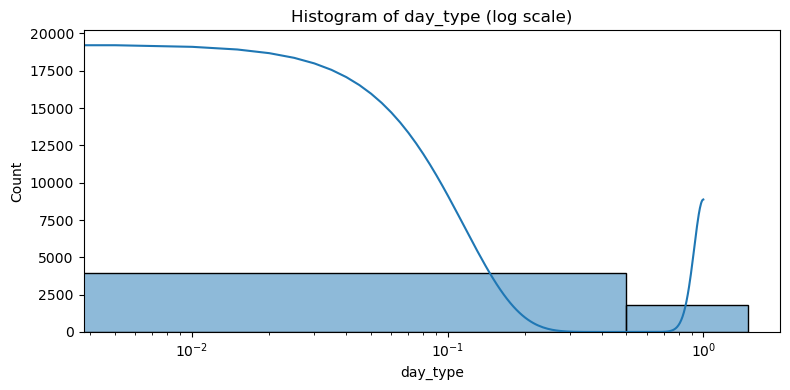

In [29]:
#Look at log transformations on the variables
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(combined_df[col], bins=30, kde=True)
    plt.xscale("log")
    plt.title(f"Histogram of {col} (log scale)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()



In [30]:
log_cols = ["washing_duration", "total_duration", "movement_0", "movement_1","movement_2","movement_3","movement_4",
           "movement_5","movement_6","movement_7","ratio_who_movements"]

for col in log_cols:
    combined_df[f"{col}_log"] = np.log1p(combined_df[col])


In [31]:
combined_df.head()

,filename,location,num_annotators,time_h,time_min,time_sec,total_duration,washing_duration,movement_1,movement_2,...,total_duration_log,movement_0_log,movement_1_log,movement_2_log,movement_3_log,movement_4_log,movement_5_log,movement_6_log,movement_7_log,ratio_who_movements_log
0,2020-06-26_18-28-10_camera102.csv,Pauls Stradins,4,18,28,10,43.5,32.7,1.1,2.4,...,3.795489,2.772589,0.741937,1.223775,1.131402,0.916291,2.028148,1.589235,0.0,0.616413
1,2020-06-26_19-05-32_camera102.csv,Pauls Stradins,4,19,5,32,53.5,31.6,3.4,1.9,...,3.998201,3.072693,1.481605,1.064711,1.098612,0.000000,1.547563,0.000000,0.0,1.055262
2,2020-06-26_19-39-32_camera102.csv,Pauls Stradins,4,19,39,32,185.8,143.0,15.8,6.3,...,5.230039,3.817712,2.821379,1.987874,3.303217,2.980619,3.424263,1.029619,0.0,0.372788
3,2020-06-26_19-42-41_camera102.csv,Pauls Stradins,3,19,42,41,27.7,27.5,0.8,1.7,...,3.356897,3.261935,0.587787,0.993252,0.000000,0.000000,0.000000,0.000000,0.0,2.401525
4,2020-06-26_20-09-27_camera102.csv,Pauls Stradins,4,20,9,27,63.1,42.6,5.3,5.3,...,4.160444,2.772589,1.840550,1.840550,1.386294,1.840550,1.987874,1.193922,0.0,0.435318


## Variable Standardization
Use the StandardScaler to standardize the variables prior to doing further analysis

In [32]:
#standardize the durations
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_cols = [
    "total_duration_log",
    "washing_duration_log",
    "movement_0_log",
    "movement_1_log",
    "movement_2_log",
    "movement_3_log",
    "movement_4_log",
    "movement_5_log",
    "movement_6_log",
    "movement_7_log",
    "ratio_who_movements_log",
    "movement_sum",
    "fraction_washing",
    "movement_balance"
]

X = combined_df[feature_cols]

X_scaled = scaler.fit_transform(combined_df[feature_cols])


In [33]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [34]:
X_scaled_df.head()

,total_duration_log,washing_duration_log,movement_0_log,movement_1_log,movement_2_log,movement_3_log,movement_4_log,movement_5_log,movement_6_log,movement_7_log,ratio_who_movements_log,movement_sum,fraction_washing,movement_balance
0,0.612394,0.930521,0.505086,-0.080490,0.979568,1.068436,0.996863,2.529760,2.063155,-0.248834,-0.838848,0.530717,0.992332,-1.622664
1,0.956238,0.894297,0.872308,1.085607,0.772306,1.018541,-0.438744,1.822523,-0.413712,-0.248834,-0.400501,0.485731,0.349302,-0.682597
2,3.045711,2.515796,1.783948,3.197781,1.975192,4.373181,4.231168,4.584301,1.190979,-0.248834,-1.082195,5.497234,1.063875,-2.190087
3,-0.131556,0.747584,1.103873,-0.323511,0.679194,-0.653163,-0.438744,-0.454891,-0.413712,-0.248834,0.944224,0.305784,1.954684,0.668529
4,1.231440,1.211660,0.505086,1.651489,1.783228,1.456293,2.444955,2.470492,1.447050,-0.248834,-1.019737,0.976084,0.686505,-2.225342


In [35]:
X_scaled_df.to_csv("hand_hygiene_scaled_features.csv", index=False)

